In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('exports and imports of india(1997- July 2022) - exports and imports.csv')
df

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002
...,...,...,...,...,...,...,...
5989,ZIMBABWE,181.72,7.79,189.51,173.93,2018,2019
5990,ZIMBABWE,161.13,13.59,174.72,147.54,2019,2020
5991,ZIMBABWE,175.72,5.71,181.42,170.01,2020,2021
5992,ZIMBABWE,200.49,7.77,208.27,192.72,2021,2022


In [6]:
df.describe()

,Financial Year(start)
count,5994.000000
mean,2009.596096
std,7.460527
min,1997.000000
25%,2003.000000
50%,2010.000000
75%,2016.000000
max,2022.000000


In [7]:
print(df.isnull().sum())  # This will print the number of missing values in each column

Country                    0
Export                     8
Import                   552
Total Trade              585
Trade Balance            586
Financial Year(start)      0
Financial Year(end)        0
dtype: int64


<Axes: >

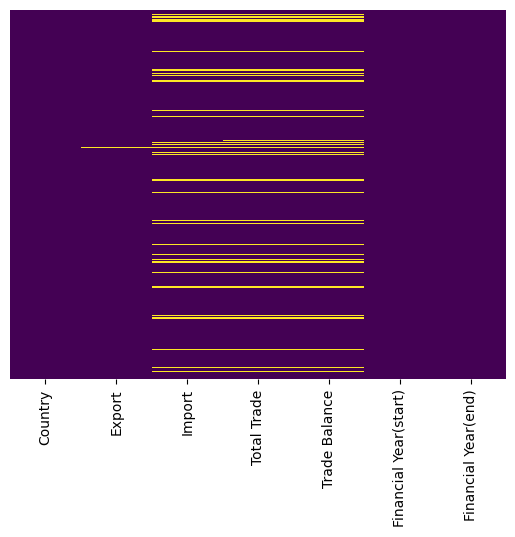

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')# to shjow the presemce of null values i.e orange horizontal line above
# every column name indicates presence of a NA value in corresponding column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                5994 non-null   object
 1   Export                 5986 non-null   object
 2   Import                 5442 non-null   object
 3   Total Trade            5409 non-null   object
 4   Trade Balance          5408 non-null   object
 5   Financial Year(start)  5994 non-null   int64 
 6   Financial Year(end)    5994 non-null   object
dtypes: int64(1), object(6)
memory usage: 327.9+ KB


In [10]:
df.nunique()

Country                   250
Export                   4455
Import                   3728
Total Trade              4603
Trade Balance            4499
Financial Year(start)      26
Financial Year(end)        26
dtype: int64

In [11]:
df['Export'] = df['Export'].replace(',', '', regex=True)
df['Import'] = df['Import'].replace(',', '', regex=True)

In [12]:
 df['Export'] = pd.to_numeric(df['Export'], errors='coerce')
 df['Import'] = pd.to_numeric(df['Import'], errors='coerce')

In [13]:
df['Export'] = df['Export'].fillna(0)
df['Import'] = df['Import'].fillna(0)

In [14]:
print(df.isnull().sum())

Country                    0
Export                     0
Import                     0
Total Trade              585
Trade Balance            586
Financial Year(start)      0
Financial Year(end)        0
dtype: int64


In [15]:
df['Total Trade'] = df['Export'] + df['Import']
df['Trade Balance'] = df['Export'] - df['Import']

In [16]:
print(df.isnull().sum())

Country                  0
Export                   0
Import                   0
Total Trade              0
Trade Balance            0
Financial Year(start)    0
Financial Year(end)      0
dtype: int64


In [17]:
df.to_csv('df.csv', index=False)

(array([5.865e+03, 8.800e+01, 1.600e+01, 8.000e+00, 8.000e+00, 4.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.   ,  7611.133, 15222.266, 22833.399, 30444.532, 38055.665,
        45666.798, 53277.931, 60889.064, 68500.197, 76111.33 ]),
 <BarContainer object of 10 artists>)

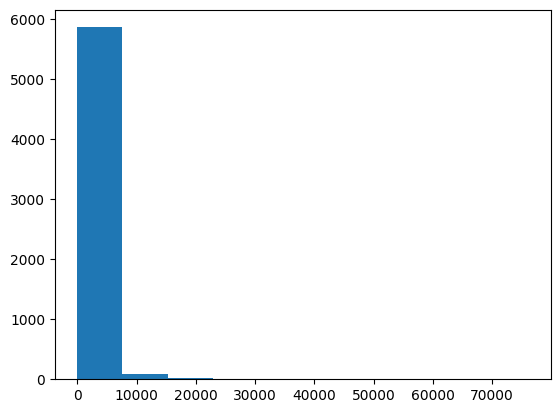

In [18]:
plt.hist(df['Export'])